In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

### Standard Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explore Data

In [27]:
df = pd.read_csv('data.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [28]:
df.shape

(252, 15)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [30]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### Check for Missing Values

In [31]:
df.isnull().values.any()

False

In [32]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

### Drop Density
Since according to the dataset [task](https://www.kaggle.com/fedesoriano/body-fat-prediction-dataset/tasks?taskId=4775), the body fat (target) is calculated directly with the density.

In [33]:
df.drop(['Density'], axis=1, inplace=True)

### Pair Plot

In [34]:
# sns.pairplot(df)

### Correlation matrix with heatmap

<AxesSubplot:>

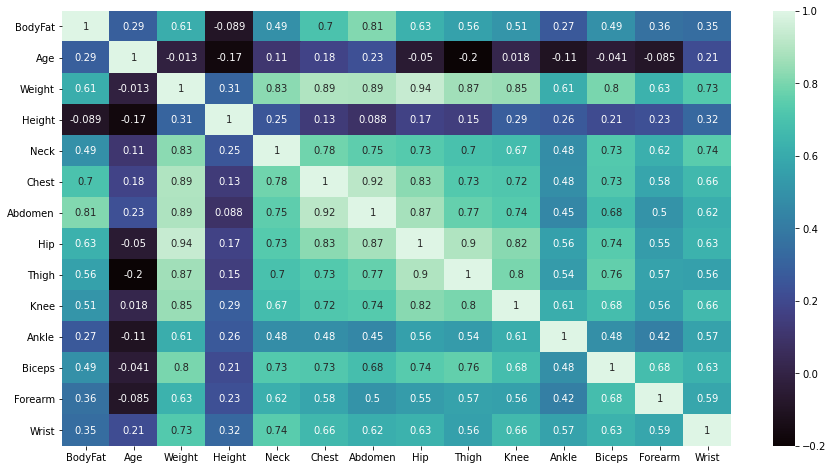

In [35]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='mako')

### Define Independent and Dependent Variables

In [36]:
X = df.iloc[:, 1:] # slice all columns excluding the first
y = df.iloc[:, 0] # slice all columns including only the first

X.head(2)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2


In [37]:
pd.DataFrame(y.head(2))

,BodyFat
0,12.3
1,6.1


In [38]:
import statsmodels.api as sm

const = sm.add_constant(X)
model = sm.OLS(y, const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BodyFat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           7.72e-64
Time:                        15:25:38   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.296     -52.365      15.988
Age            0.0621      0.032      1.919      0.056      -0.002       0.126
Weight        -0.0884      0.054     -1.652      0.100      -0.194       0.017
Height        -0.0696      0.096     -0.725      0.469      -0.259       0.120
Neck          -0.4706      0.232     -2.024      0.044      -0.929      -0.013
Chest         -0.0239      0.099     -0.241      0.810      -0.219       0.171
Abdomen        0.9548      0.086     11.044      0.000       0.784       1.125
Hip           -0.2075      0.146     -1.422      0.156      -0.495       0.080
Thigh          0.2361      0.144      1.636      0.103      -0.048       0.520
Knee           0.0153      0.242      0.063      0.950      -0.461       0.492
Ankle          0.1740      0.221      0.786      0.433      -0.262       0.610
Biceps         0.1816      0.171      1.061      0.290      -0.156       0.519
Forearm        0.4520      0.199      2.270      0.024       0.060       0.844
Wrist         -1.6206      0.535     -3.030      0.003      -2.674      -0.567
==============================================================================
Omnibus:                        4.404   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.820
Skew:                          -0.012   Prob(JB):                        0.244
Kurtosis:                       2.482   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Explore Feature Importance

In [39]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()
et.fit(X, y)

ExtraTreesRegressor()

<AxesSubplot:>

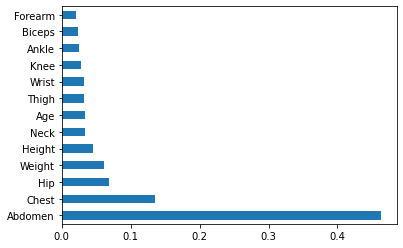

In [40]:
best_features = pd.Series(et.feature_importances_, index=X.columns)
best_features.nlargest(len(X.columns)).plot(kind='barh')

### Split Dataset

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# **Train Regressor Models**

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def train_model(regressor_model):
  regressor_model.fit(X_train ,y_train)
  y_pred = regressor_model.predict(X_test)
  score = regressor_model.score(X_test, y_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  y_pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
  })

  print(f"Score: {score}")
  print(f"RMSE: {rmse}\n")
  print(y_pred_df.head())

### *Linear Regression*

In [43]:
train_model(LinearRegression())

Score: 0.7706925684367167
RMSE: 3.880730569267365

     Actual Value  Predicted Value
158          12.5        12.354664
83           27.0        21.142980
170           3.0        12.085070
101          20.4        19.858909
150           9.4         9.097213


### **Hyperparameter Tuning**
For Ridge and Lasso models

In [44]:
from sklearn.model_selection import GridSearchCV

alpha_values = [1e-15, 1e-10, 1e-8, 1e-2, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

model_params = {
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': alpha_values}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': alpha_values}
    }
}

In [45]:
scores = []

for model_name, data in model_params.items():
  regressor = GridSearchCV(data['model'], data['params'], cv=5)
  regressor.fit(X, y)

  scores.append({
      'Model': model_name,
      'Best Score': regressor.best_score_,
      'Best Params': regressor.best_params_
  })

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1229.8948125928096, tolerance: 1.264589592039801
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288.6240033808365, tolerance: 1.4309761890547263
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.8312875194424, tolerance: 1.6031040841584159
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

In [46]:
tuned_models_df = pd.DataFrame(scores, columns=['Model', 'Best Score', 'Best Params'])
tuned_models_df

,Model,Best Score,Best Params
0,Ridge,0.645302,{'alpha': 15}
1,Lasso,0.645257,{'alpha': 0.01}


### *Lasso Model*

In [47]:
lasso = Lasso(alpha=0.01)
train_model(lasso)

Score: 0.7709470319980494
RMSE: 3.878576738869812

     Actual Value  Predicted Value
158          12.5        12.294326
83           27.0        21.142284
170           3.0        12.103163
101          20.4        19.835526
150           9.4         9.112761


### *Ridge Regressor*

In [48]:
ridge = Ridge(alpha=15)
train_model(ridge)

Score: 0.7713553091260034
RMSE: 3.8751184984889817

     Actual Value  Predicted Value
158          12.5        11.800518
83           27.0        21.397196
170           3.0        12.202375
101          20.4        19.535189
150           9.4         9.315689


### Export Model

In [49]:
from joblib import dump, load

# dump(ridge, 'ridge_regr_model.joblib')

['ridge_regr_model.joblib']

In [51]:
ridge_regr_model = load('../models/ridge_regr_model.joblib')
ridge_regr_model.predict([[23, 154.25, 67.75, 36.2, 93.1, 85.2, 94.5, 59.0, 37.3, 21.9, 32.0, 27.4, 17.1]])

array([16.85223934])

<!-- from joblib import dump, load

dump(knn, 'ridge_regr_model.joblib') -->